# **Decision Tree**

* different classes
* multiple decision boundaries
* It works by splitting the data into branches based on feature
  values, forming a tree-like structure
* both classification(label) and regression(numeric)
1. root(decision) node
2. leaf(final_output) node
3. decision(condition for splitting) node
* sub_tree(root+leaf)

# **Example 1**

**Classification Tree**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

import seaborn as sn
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Camerin DSML/salaries.csv')
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [ ]:
df.isna().sum()

,0
company,0
job,0
degree,0
salary_more_then_100k,0


In [ ]:
df.shape

(16, 4)

In [ ]:
df.dtypes

,0
company,object
job,object
degree,object
salary_more_then_100k,int64


<Axes: xlabel='company', ylabel='count'>

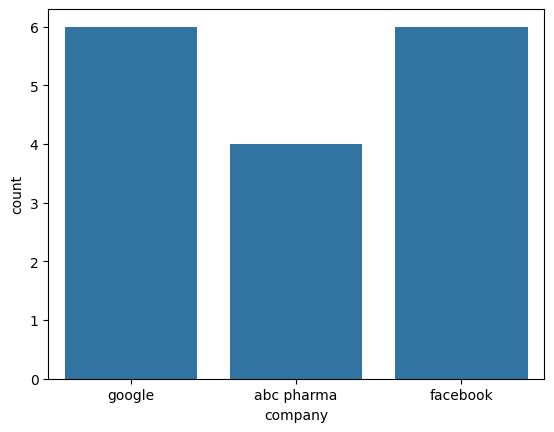

In [ ]:
sn.countplot(df,x='company')

<Axes: xlabel='job', ylabel='count'>

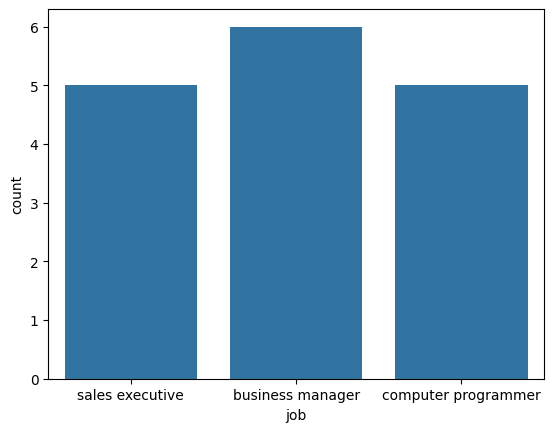

In [ ]:
sn.countplot(df,x='job')

<Axes: xlabel='degree', ylabel='count'>

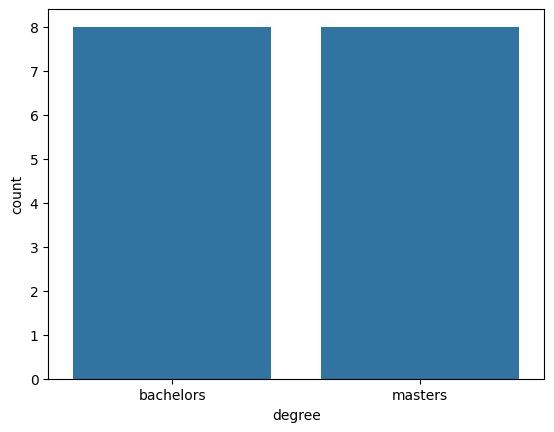

In [ ]:
sn.countplot(df,x='degree')

In [ ]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df['company']=label_encoder.fit_transform(df['company'])
df['degree']=label_encoder.fit_transform(df['degree'])
df['job']=label_encoder.fit_transform(df['job'])

In [ ]:
df['company'].unique()

array([2, 0, 1])

In [ ]:
df['degree'].unique()

array([0, 1])

In [ ]:
df['job'].unique()

array([2, 0, 1])

In [ ]:
df.dtypes

,0
company,int64
job,int64
degree,int64
salary_more_then_100k,int64


In [ ]:
x=df.drop(columns='salary_more_then_100k')
x.head()

,company,job,degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0


In [ ]:
y=df['salary_more_then_100k']
y.head()

,salary_more_then_100k
0,0
1,0
2,1
3,1
4,0


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=1)

In [ ]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

pred_y=model.predict(x_test)
pred_y

array([1, 1, 0, 0])

In [ ]:
a=model.score(x_test,y_test)
print(f"Accuracy od the model : {np.round((a*100),2)}%")

Accuracy od the model : 75.0%


<Axes: >

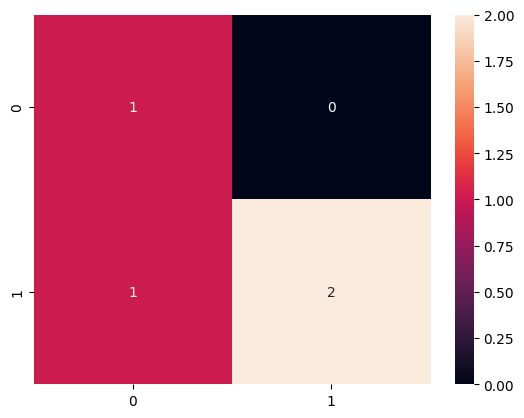

In [ ]:
cm=confusion_matrix(y_test,pred_y)
cm
sn.heatmap(cm,annot=True)

In [ ]:
classification_report(y_test,pred_y)

'              precision    recall  f1-score   support\n\n           0       0.50      1.00      0.67         1\n           1       1.00      0.67      0.80         3\n\n    accuracy                           0.75         4\n   macro avg       0.75      0.83      0.73         4\nweighted avg       0.88      0.75      0.77         4\n'

In [ ]:
df.head()
a=pd.DataFrame([[2,2,1]])
predict=model.predict(a)
#print(predict)
if predict==1:
  print("You'll have a salary  more than 100k")
else:
  print("Your salary will be less than 100k")

Your salary will be less than 100k


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# **Example 2**

# **Regression Tree**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

import seaborn as sn

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Camerin DSML/diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [ ]:
df=df.drop(columns='Unnamed: 0')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.shape

(53940, 10)

In [ ]:
df.isna().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


In [ ]:
df.dtypes

,0
carat,float64
cut,object
color,object
clarity,object
depth,float64
table,float64
price,int64
x,float64
y,float64
z,float64


<Axes: xlabel='cut', ylabel='count'>

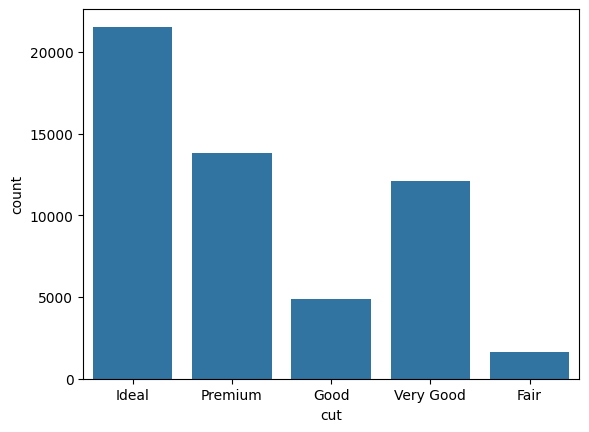

In [ ]:
sn.countplot(df,x='cut')

<Axes: xlabel='color', ylabel='count'>

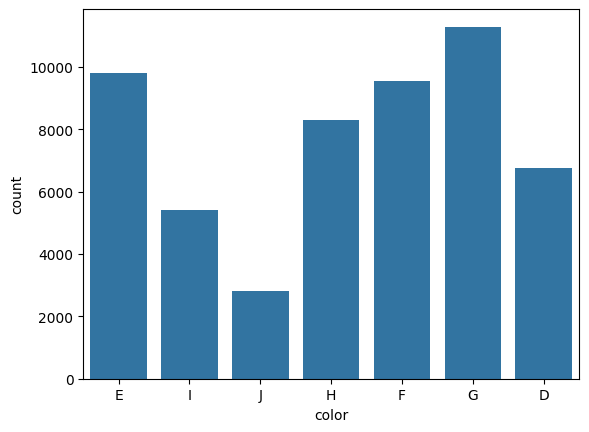

In [ ]:
sn.countplot(df,x='color')

<Axes: xlabel='clarity', ylabel='count'>

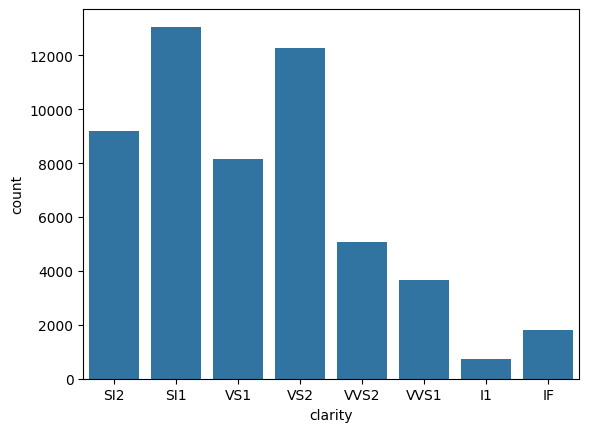

In [ ]:
sn.countplot(df,x='clarity')

In [ ]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df['cut']=label_encoder.fit_transform(df['cut'])
df['clarity']=label_encoder.fit_transform(df['clarity'])
df['color']=label_encoder.fit_transform(df['color'])

In [ ]:
df['cut'].unique()

array([2, 3, 1, 4, 0])

In [ ]:
df['color'].unique()

array([1, 5, 6, 4, 2, 3, 0])

In [ ]:
df['clarity'].unique()

array([3, 2, 4, 5, 7, 6, 0, 1])

In [ ]:
df.dtypes

,0
carat,float64
cut,int64
color,int64
clarity,int64
depth,float64
table,float64
price,int64
x,float64
y,float64
z,float64


In [ ]:
x=df.drop(columns='price')
x.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75


In [ ]:
y=df['price']
y.head()

,price
0,326
1,326
2,327
3,334
4,335


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.4,random_state=7)

In [ ]:
model=DecisionTreeRegressor()
model.fit(x_train,y_train)

pred_y=model.predict(x_test)
pred_y

array([1000., 4178., 3990., ...,  536., 1214., 2061.])

In [ ]:
a=model.score(x_test,y_test)
print(f"Accuracy of the model : {np.round((a*100),2)}%")

Accuracy of the model : 96.22%


In [ ]:
df.head()
a=pd.DataFrame([[0.78,1,2,4,48.7,50.0,3.95,2.23,2.00]])
predict=model.predict(a)
print(f"Price of the diamond will be {np.round(predict,2)}Rs")

Price of the diamond will be [2130.]Rs


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


# **Example 3**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Camerin DSML/1666935278680_car_evaluation.csv')
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [ ]:
df=df.rename(columns={'vhigh':'buying_price',"vhigh.1":"main_cost","2":'no_of_doors','2.1':'no_of_person','small':'foot_area','low':'safety','unacc':'decision'})
df.head()

,buying_price,main_cost,no_of_doors,no_of_person,foot_area,safety,decision
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [ ]:
df.isna().sum()

,0
buying_price,0
main_cost,0
no_of_doors,0
no_of_person,0
foot_area,0
safety,0
decision,0


In [ ]:
df.shape

(1727, 7)

In [ ]:
df.dtypes

,0
buying_price,object
main_cost,object
no_of_doors,object
no_of_person,object
foot_area,object
safety,object
decision,object


In [ ]:
df['buying_price'].unique()
df['buying_price']=df['buying_price'].map({'low':0,'med':1,'high':2,'vhigh':3})
df['buying_price'].unique()

array([3, 2, 1, 0])

In [ ]:
df['main_cost'].unique()
df['main_cost']=df['main_cost'].map({'low':0,'med':1,'high':2,'vhigh':3})
df['main_cost'].unique()

array([3, 2, 1, 0])

In [ ]:
df['no_of_doors'].unique()
df['no_of_doors']=df['no_of_doors'].map({'2':0,"3":1,'4':2,'5more':3})
df['no_of_doors'].unique()

array([0, 1, 2, 3])

In [ ]:
df['foot_area'].unique()
df['foot_area']=df['foot_area'].map({'small':0,'med':1,'big':2})
df['foot_area'].unique()

array([0, 1, 2])

In [ ]:
df['no_of_person'].unique()
df['no_of_person']=df['no_of_person'].map({'2':0,'4':1,'more':2})
df['no_of_person'].unique()

array([0, 1, 2])

In [ ]:
df['safety'].unique()
df['safety']=df['safety'].map({'low':0,"med":1,"high":2})
df['safety'].unique()

array([1, 2, 0])

In [ ]:
df['decision'].unique()
df['decision']=df['decision'].map({'unacc':0,'acc':1,"good":2,"vgood":3})
df['decision'].unique()

array([0, 1, 3, 2])

In [ ]:
df.dtypes

,0
buying_price,int64
main_cost,int64
no_of_doors,int64
no_of_person,int64
foot_area,int64
safety,int64
decision,int64


In [ ]:
x=df.drop(columns='decision')
x.head()

,buying_price,main_cost,no_of_doors,no_of_person,foot_area,safety
0,3,3,0,0,0,1
1,3,3,0,0,0,2
2,3,3,0,0,1,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2


In [ ]:
y=df['decision']
y.head()

,decision
0,0
1,0
2,0
3,0
4,0


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=7)

In [ ]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

pred_y=model.predict(x_test)
pred_y

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 3, 1, 1, 1,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 3, 0, 1, 0,
       0, 0, 3, 0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 1, 0, 2,
       3, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 2, 0, 0,
       0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 3, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 3, 0, 0, 1, 1, 0, 0, 1, 3, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 3, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 1, 0, 3,

In [ ]:
a=model.score(x_test,y_test)
print(f"Accuracy of the model : {np.round((a*100),2)}%")

Accuracy of the model : 96.53%


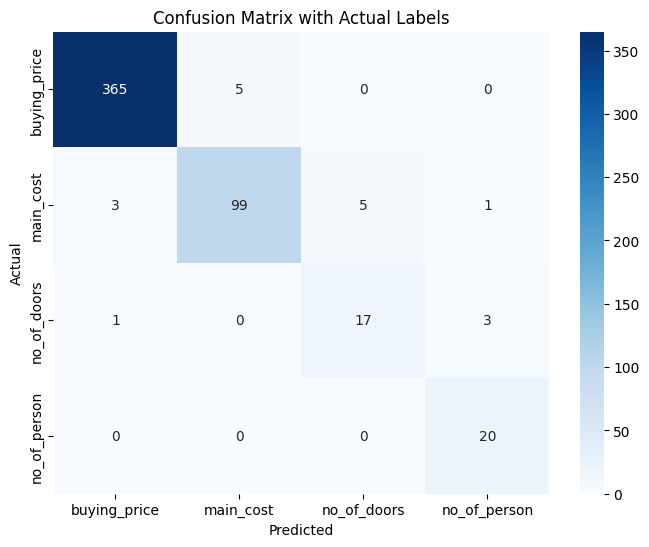

In [ ]:
# from sklearn.metrics import confusion_matrix
# import numpy as np
# import seaborn as sn
# import matplotlib.pyplot as plt

# # Your actual class names
# labels = [
#     'buying_price',
#     'main_cost',
#     'no_of_doors',
#     'no_of_person',
#     'foot_area',
#     'safety',
#     'decision'
# ]

# # If y_test and pred_y are encoded numbers, map them back to their names
# # (skip this part if they already contain text labels)
# label_map = {i: label for i, label in enumerate(labels)}
# y_test_named = [label_map[y] if y in label_map else y for y in y_test]
# pred_y_named = [label_map[y] if y in label_map else y for y in pred_y]

# # Automatically extract the unique class names actually used in your data
# unique_labels = np.unique(np.concatenate((y_test_named, pred_y_named)))

# # Compute confusion matrix
# cm = confusion_matrix(y_test_named, pred_y_named, labels=unique_labels)

# # Plot heatmap
# plt.figure(figsize=(8, 6))
# sn.heatmap(cm, annot=True, fmt='d', cmap='Blues',
#            xticklabels=unique_labels,
#            yticklabels=unique_labels)

# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix with Actual Labels')
# plt.show()



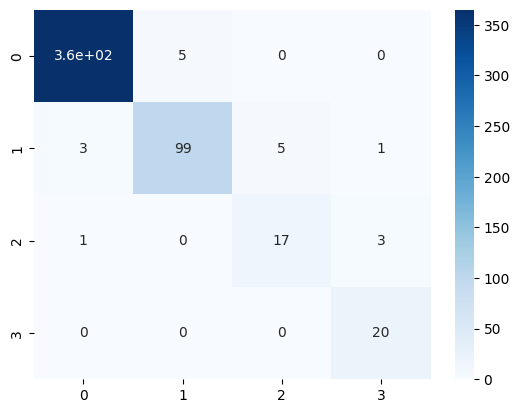

In [ ]:
cm=confusion_matrix(y_test,pred_y)
cm
sn.heatmap(cm,annot=True,cmap='Blues')
plt.show()

In [ ]:
classification_report(y_test,pred_y)

'              precision    recall  f1-score   support\n\n           0       0.99      0.99      0.99       370\n           1       0.95      0.92      0.93       108\n           2       0.77      0.81      0.79        21\n           3       0.83      1.00      0.91        20\n\n    accuracy                           0.97       519\n   macro avg       0.89      0.93      0.91       519\nweighted avg       0.97      0.97      0.97       519\n'

In [ ]:
df.head()
a=pd.DataFrame([[3,3,4,7,2,4]])
predict=model.predict(a)
if predict==0:
  print('Unaccounted')
elif predict==1:
  print("accounted")
elif predict==2:
  print("Good decision")
elif predict==3:
  print("Very good decision")

Unaccounted


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
